In [56]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_breast_cancer  # To load the dataset
from sklearn.metrics import accuracy_score  # To evaluate the model



from collections import Counter

In [64]:
# Step 1: Load the Breast Cancer dataset
data = load_breast_cancer()  # Load the dataset
X = data.data  # Features (independent variables)
y = data.target  # Target (dependent variable: 0 = malignant, 1 = benign)


In [66]:
# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [68]:
# Step 3: Standardize the features
scaler = StandardScaler()  # Initialize the scaler
X_train = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test = scaler.transform(X_test)  # Transform the testing data using the same scaler

In [70]:

# Define the KNN class
class KNearestNeighbors:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        # Compute distances between x and all training points
        distances = [np.sqrt(np.sum((x - x_train)**2)) for x_train in self.X_train]
        
        # Sort distances and get indices of k-nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        
        # Get the labels of k-nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # Majority voting for classification
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# Example Dataset
# X_train = np.array([[1, 2], [2, 3], [3, 3], [6, 6], [7, 7], [8, 6]])
# y_train = np.array([0, 0, 0, 1, 1, 1])  # Labels (binary classification)

# X_test = np.array([[5, 5], [2, 2]])

# Initialize and train KNN model
k = 3  # Number of neighbors
knn = KNearestNeighbors(k=k)
knn.fit(X_train, y_train)

# Make predictions
predictions = knn.predict(X_test)
print("Predictions:", predictions)


Predictions: [1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


In [72]:
accuracy = accuracy_score(y_test, predictions)  # Calculate accuracy
print("\nModel evaluation:")
print(f"Accuracy of KNN model: {accuracy:.2f}")


Model evaluation:
Accuracy of KNN model: 0.95


##########################
USING LIBRARY
#############################

In [74]:

# Step 4: Train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)  # Initialize KNN with 5 neighbors
knn.fit(X_train, y_train)  # Train the model on the training set

# Step 5: Make predictions on the test set
y_pred = knn.predict(X_test)  # Predict the test set labels

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
print("\nModel evaluation:")
print(f"Accuracy of KNN model: {accuracy:.2f}")



Model evaluation:
Accuracy of KNN model: 0.95


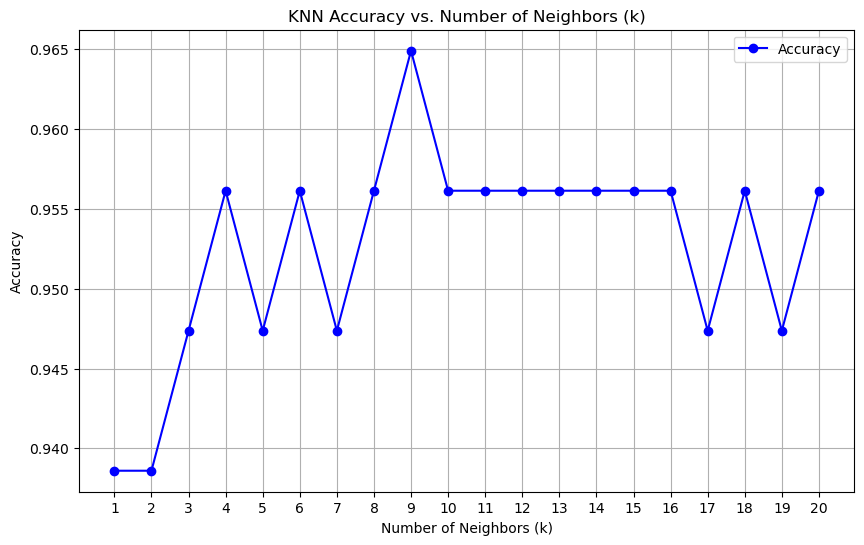

In [78]:
# Step 4: Evaluate KNN for different values of k
k_values = range(1, 21)  # Try k from 1 to 20
accuracies = []  # Store accuracy for each k

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # Initialize KNN with current k
    knn.fit(X_train, y_train)  # Train the model
    y_pred = knn.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    accuracies.append(accuracy)  # Save accuracy

# Step 5: Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')
plt.title("KNN Accuracy vs. Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(k_values)  # Show every integer k on the x-axis
plt.grid(True)
plt.legend()
plt.show()